In [5]:
# import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for our plots
sns.set_style('whitegrid')

# # Load the processed data
# df = pd.read_csv('../data/processed_data.csv')

# # Display the first 5 rows to confirm it loaded correctly
# df.head()

In [14]:
# First, let's see the column names without loading the data
import pandas as pd
col_names = pd.read_csv('../data/processed_data.csv', nrows=0).columns

print(col_names)

# NOW, let's say you only need 'loan_amnt', 'term', 'int_rate', and 'loan_status'
# We'll also specify their types to save memory
# Use 'float32' instead of 'float64', and 'int32' instead of 'int64' where possible

use_cols = ['loan_amnt', 'term', 'int_rate', 'loan_status','purpose','is_bad_loan','grade']

# For the mixed-type columns that you DO need, load them as 'object' (string)
# Let's pretend column 19 from the warning is 'some_mixed_col'
dtype_map = {
    'loan_amnt': 'int32',
    'term': 'int32',
    'int_rate': 'float32',
    'loan_status': 'object',
    'some_mixed_col': 'object',
    'purpose': 'object',
    'is_bad_loan': 'int32',
    'grade': 'object' 
    # Explicitly tell pandas this is a text column
}

# Only load the columns you need with the specified types
# We're not using low_memory=False because specifying dtypes is more efficient
df = pd.read_csv(
    '../data/processed_data.csv', 
    usecols=use_cols, 
    dtype=dtype_map
)

df.head()

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_last_payment_amount', 'disbursement_method',
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term', 'is_bad_loan'],
      dtype='object', length=152)


,loan_amnt,term,int_rate,grade,loan_status,purpose,is_bad_loan
0,3600,36,13.990000,C,Fully Paid,debt_consolidation,0
1,24700,36,11.990000,C,Fully Paid,small_business,0
2,20000,60,10.780000,B,Fully Paid,home_improvement,0
3,35000,60,14.850000,C,Current,debt_consolidation,0
4,10400,60,22.450001,F,Fully Paid,major_purchase,0


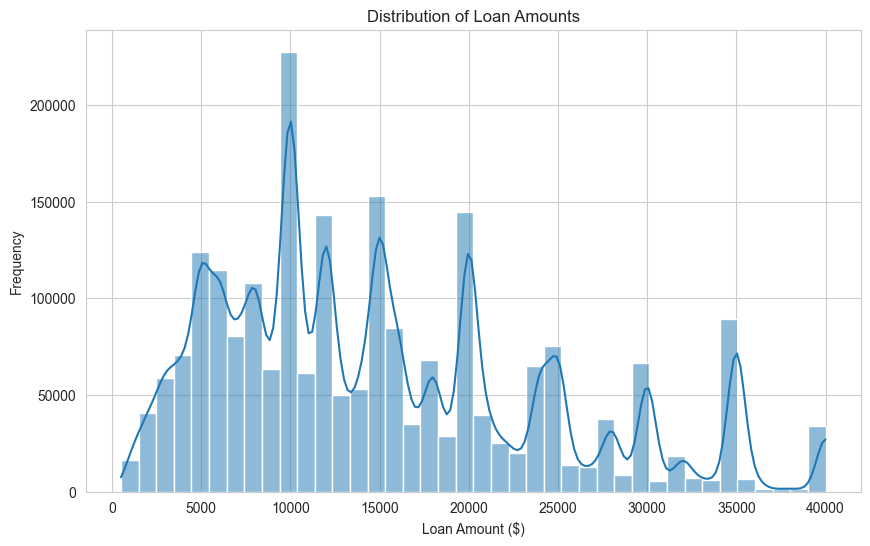

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['loan_amnt'], bins=40, kde=True)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Frequency')
plt.show()

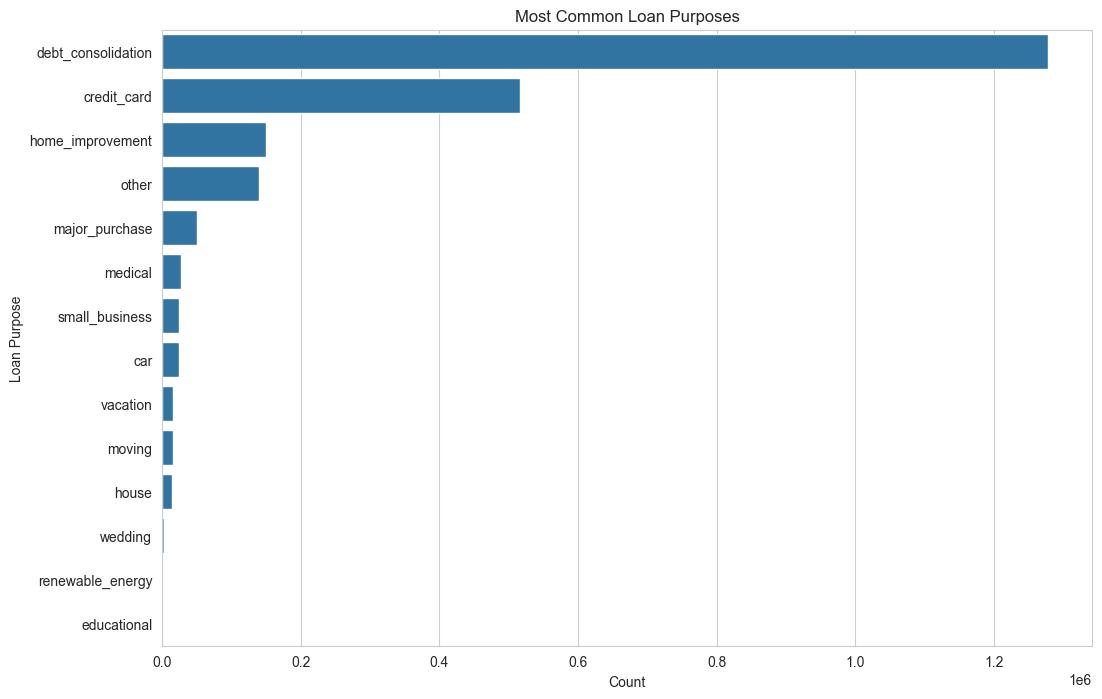

In [10]:
plt.figure(figsize=(12, 8))
sns.countplot(y=df['purpose'], order = df['purpose'].value_counts().index)
plt.title('Most Common Loan Purposes')
plt.xlabel('Count')
plt.ylabel('Loan Purpose')
plt.show()

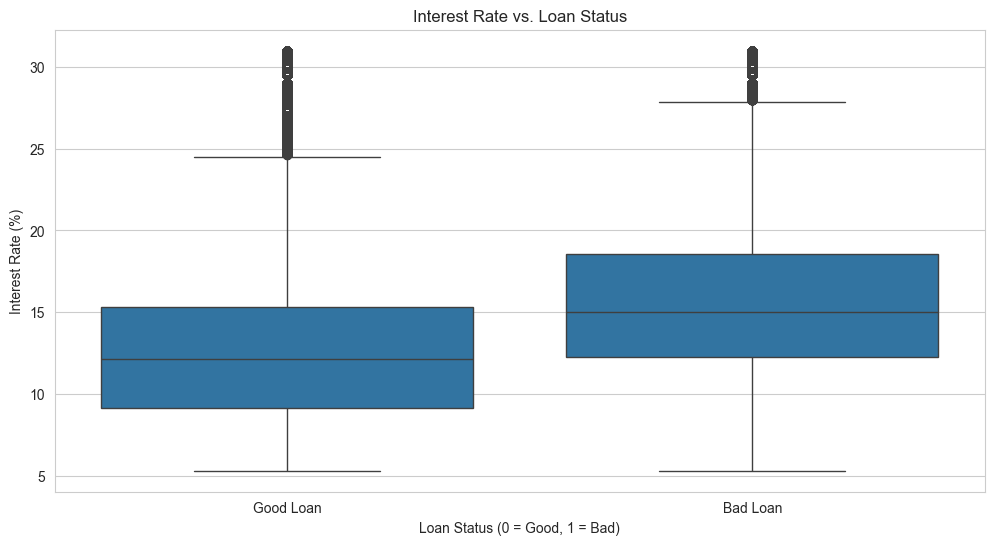

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='is_bad_loan', y='int_rate', data=df)
plt.title('Interest Rate vs. Loan Status')
plt.xlabel('Loan Status (0 = Good, 1 = Bad)')
plt.ylabel('Interest Rate (%)')
plt.xticks([0, 1], ['Good Loan', 'Bad Loan'])
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_3640\3748106662.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grade_default_rate.index, y=grade_default_rate.values, palette='viridis')


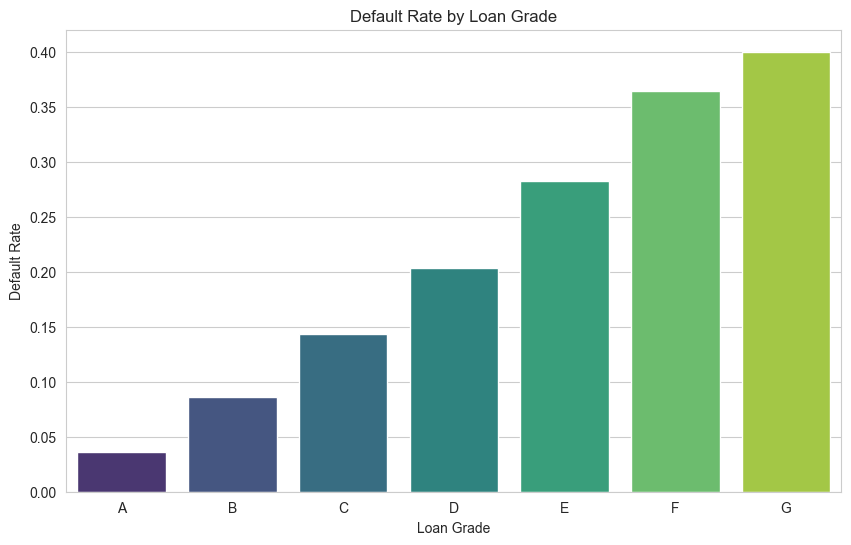

In [15]:
# Calculate the default rate for each grade
grade_default_rate = df.groupby('grade')['is_bad_loan'].mean().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=grade_default_rate.index, y=grade_default_rate.values, palette='viridis')
plt.title('Default Rate by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Default Rate')
plt.show()

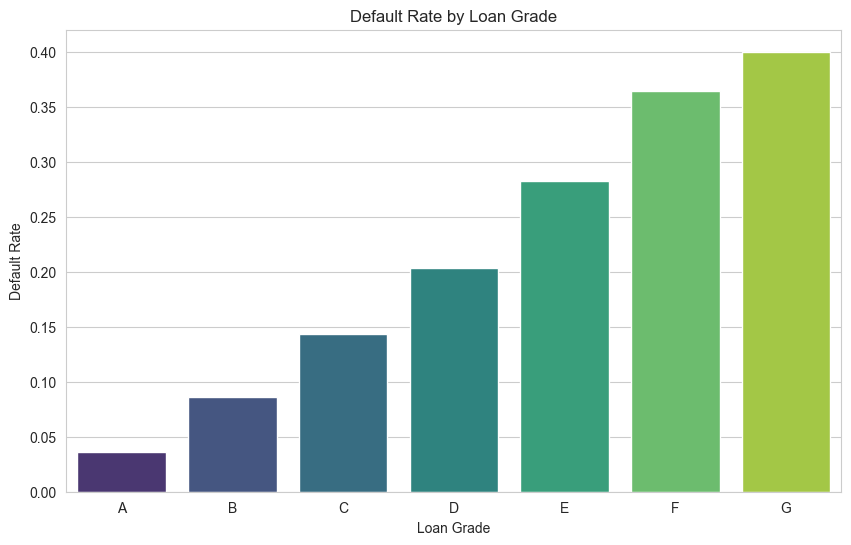

In [16]:
# Calculate the default rate for each grade
grade_default_rate = df.groupby('grade')['is_bad_loan'].mean().sort_index()

plt.figure(figsize=(10, 6))

# Updated plotting code
sns.barplot(
    x=grade_default_rate.index, 
    y=grade_default_rate.values, 
    palette='viridis',
    hue=grade_default_rate.index,
    legend=False
)

plt.title('Default Rate by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Default Rate')
plt.show()